<a href="https://colab.research.google.com/github/np03cs4a240030-lab/worksheet1_ayush/blob/main/Worksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [12]:
data = pd.read_csv("/content/drive/MyDrive/5CS037 - 2025 - Materials/Week - 2 - Describing the World with Data/Dataset/diabetes_.csv")
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [14]:

data = data.fillna(data.mean())

In [15]:

X = data.drop(columns=["Outcome"]).values
y = data["Outcome"].values

In [16]:
# 4. Train-test split
def train_test_split_scratch(X, y, test_size=0.3):
    np.random.seed(42)
    idx = np.arange(len(X))
    np.random.shuffle(idx)

    test_len = int(len(X) * test_size)
    test_idx = idx[:test_len]
    train_idx = idx[test_len:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)

In [17]:
# 5. Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [18]:
# 6. KNN prediction for single point
def knn_predict_single(query, X_train, y_train, k=3):
    distances = []
    for x in X_train:
        distances.append(euclidean_distance(query, x))

    k_index = np.argsort(distances)[:k]
    k_labels = y_train[k_index]

    return np.bincount(k_labels).argmax()

In [19]:
# 7. KNN prediction for all test data
def knn_predict(X_test, X_train, y_train, k=3):
    preds = []
    for x in X_test:
        preds.append(knn_predict_single(x, X_train, y_train, k))
    return np.array(preds)

In [20]:
# 8. Accuracy function
def accuracy(y_true, y_pred):
    return (np.sum(y_true == y_pred) / len(y_true)) * 100

In [21]:
# 9. Run model
predictions = knn_predict(X_test, X_train, y_train, k=3)
acc_original = accuracy(y_test, predictions)

print("Problem 1 Accuracy (Original Data):", acc_original)

Problem 1 Accuracy (Original Data): 67.3913043478261


In [30]:
# 10. Min-Max Scaling
def min_max_scale(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = min_max_scale(X)

In [29]:
#11. Train-test split on scaled data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)

In [28]:
#12. Run KNN on scaled data
pred_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
acc_scaled = accuracy(y_test_s, pred_scaled)

print("Accuracy without Scaling:", acc_original)
print("Accuracy with Scaling:", acc_scaled)

Accuracy without Scaling: 67.3913043478261
Accuracy with Scaling: 69.1304347826087


In [25]:
k_values = range(1, 16)
accuracy_list = []
time_list = []

for k in k_values:
    start_time = time.time()
    preds = knn_predict(X_test, X_train, y_train, k)
    end_time = time.time()

    acc_k = accuracy(y_test, preds)
    accuracy_list.append(acc_k)
    time_list.append(end_time - start_time)

    print("k =", k, "| Accuracy =", acc_k, "| Time =", end_time - start_time)

k = 1 | Accuracy = 68.69565217391305 | Time = 1.7041594982147217
k = 2 | Accuracy = 72.60869565217392 | Time = 1.692725419998169
k = 3 | Accuracy = 67.3913043478261 | Time = 1.1907310485839844
k = 4 | Accuracy = 72.17391304347827 | Time = 0.9650814533233643
k = 5 | Accuracy = 68.69565217391305 | Time = 1.1846284866333008
k = 6 | Accuracy = 70.0 | Time = 1.1706197261810303
k = 7 | Accuracy = 69.1304347826087 | Time = 1.0326120853424072
k = 8 | Accuracy = 71.30434782608695 | Time = 0.9766278266906738
k = 9 | Accuracy = 70.0 | Time = 0.9694130420684814
k = 10 | Accuracy = 71.73913043478261 | Time = 0.9452321529388428
k = 11 | Accuracy = 73.04347826086956 | Time = 0.9696335792541504
k = 12 | Accuracy = 73.91304347826086 | Time = 0.9603447914123535
k = 13 | Accuracy = 74.34782608695653 | Time = 1.6423606872558594
k = 14 | Accuracy = 72.60869565217392 | Time = 1.719491958618164
k = 15 | Accuracy = 73.91304347826086 | Time = 4.020599603652954


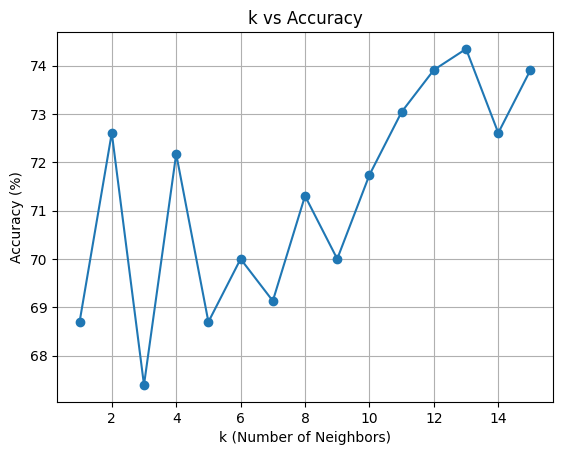

In [27]:
# Plot k vs Accuracy
plt.plot(k_values, accuracy_list, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy (%)")
plt.title("k vs Accuracy")
plt.grid(True)
plt.show()

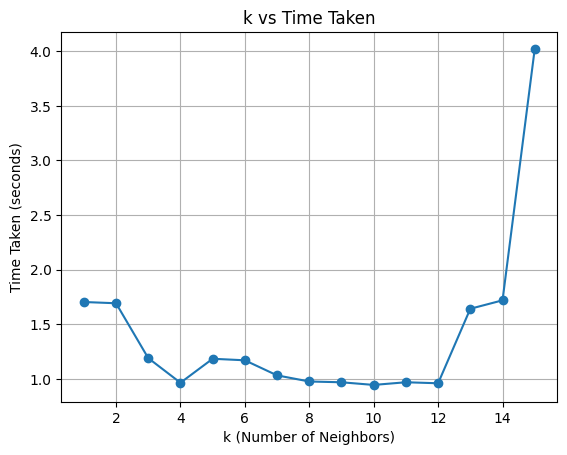

In [26]:
# Plot k vs Time Taken
plt.plot(k_values, time_list, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Time Taken (seconds)")
plt.title("k vs Time Taken")
plt.grid(True)
plt.show()
